In [1864]:
import setuptools.dist
import numpy as np
import pandas as pd
import warnings
import keras
import tensorflow as tf
from tensorflow.keras.layers import Flatten, Dense, BatchNormalization
from tensorflow.keras.utils import to_categorical
warnings.filterwarnings("ignore")
from matplotlib import pyplot as plt

In [1865]:
def DeleteCols(cvsFile, toEraseSign):
    for currentCol in cvsFile.columns:
        if (toEraseSign in currentCol):
            del cvsFile[currentCol]

In [1866]:
ColsToErase = ["IP_FLAG", "SME_FLAG", "VALUE_DT", "OPEN_DT", 
               "EMPLOYEE_FLAG", "REFUGEE_FLAG", "CARD_TYPE", "JOB", 
               "ORGANIZATION", "CREDIT_PRODUCT_CODE", "CARD_PRODUCT_CODE", "CREDIT_TYPE", "CREDIT_PURCHASE", "CLIENT_ID", "СС_OVERDUE_IND", "OVERDUE_IND"]

StrData = ["REGION", "MARITAL_STATUS"]


In [1867]:
clientData = pd.read_csv("C:\\Users\\USER\\CsvFiles\\client_ds.csv")
creditData = pd.read_csv("C:\\Users\\USER\\CsvFiles\\credit_ds.csv")
cardData = pd.read_csv("C:\\Users\\USER\\CsvFiles\\card_ds.csv")

In [1868]:
cardData.rename(columns = {'PRODUCT_CODE':'CARD_PRODUCT_CODE' }, inplace = True)
creditData.rename(columns = {'PRODUCT_CODE':'CREDIT_PRODUCT_CODE' }, inplace = True)

In [1869]:
resultData = pd.merge(clientData, creditData.set_index('CLIENT_ID').join(cardData.set_index('CLIENT_ID')), on = 'CLIENT_ID', sort = True)
resultData = resultData.fillna(0)

for i in range(3):
    selected_rows1 = resultData['СС_OVERDUE_IND'].isin([1])
    resultData = pd.concat([resultData, resultData[selected_rows1]], ignore_index = True)
    
for i in range(3):
    selected_rows1 = resultData['OVERDUE_IND'].isin([1])
    resultData = pd.concat([resultData, resultData[selected_rows1]], ignore_index = True)

resultData

,CLIENT_ID,AGE,REGION,GENDER,JOB,ORGANIZATION,INCOME,MARITAL_STATUS,IP_FLAG,SME_FLAG,...,CURR_RATE_NVAL,VALUE_DT,OVERDUE_IND,CARD_TYPE,CARD_PRODUCT_CODE,CС_LIMIT_NVAL,СС_GRACE_PERIOD,CURR_RATE,OPEN_DT,СС_OVERDUE_IND
0,4,40,Челябинская,2,0,ООО БЕТОН +,120000,Неизвестно,0.0,0.0,...,14.50,7/26/2021,0,0,0,0.0,0.0,0.0,0,0.0
1,5,36,Новосибирская,2,0,"ООО ""ЗАРПЛАТА.РУ""",60000,Неизвестно,0.0,0.0,...,10.00,12/1/2022,0,0,0,0.0,0.0,0.0,0,0.0
2,23,33,Санкт-Петербург,2,0,"ООО ""АЛЕКС-ГРУП""",80000,Не женат / не замужем,0.0,0.0,...,18.17,2/28/2023,0,0,0,0.0,0.0,0.0,0,0.0
3,117,54,Карелия,1,0,РКС ВОДОКАНАЛ,40000,Неизвестно,0.0,0.0,...,15.65,3/24/2021,1,0,0,0.0,0.0,0.0,0,0.0
4,118,76,Сахалинская,2,0,ПЕНСИОННЫЙ ФОНД РФ,35000,Не женат / не замужем,0.0,0.0,...,15.40,1/7/2023,0,0,0,0.0,0.0,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7007,32566,29,Челябинская,2,0,ИП ПРОТКЕЕВИЧ ВАЛЕНТИНА ПЕТРОВНА,105000,Неизвестно,0.0,0.0,...,17.60,3/7/2023,1,кредитная,CC_GRACE145_ONLINE_28.9,150000.0,56.0,69.9,10/12/2022,1.0
7008,32566,29,Челябинская,2,0,ИП ПРОТКЕЕВИЧ ВАЛЕНТИНА ПЕТРОВНА,105000,Неизвестно,0.0,0.0,...,17.60,3/7/2023,1,кредитная,CC_GRACE145_ONLINE_28.9,150000.0,56.0,69.9,10/12/2022,1.0
7009,32566,29,Челябинская,2,0,ИП ПРОТКЕЕВИЧ ВАЛЕНТИНА ПЕТРОВНА,105000,Неизвестно,0.0,0.0,...,17.60,3/7/2023,1,кредитная,CC_GRACE145_ONLINE_28.9,150000.0,56.0,69.9,10/12/2022,1.0
7010,32566,29,Челябинская,2,0,ИП ПРОТКЕЕВИЧ ВАЛЕНТИНА ПЕТРОВНА,105000,Неизвестно,0.0,0.0,...,17.60,3/7/2023,1,кредитная,CC_GRACE145_ONLINE_28.9,150000.0,56.0,69.9,10/12/2022,1.0


In [1870]:
def ProcessTerm(cvsFile):
    currentStr = cvsFile["TERM"]

    cvsFile["TERM"] = [int(currentStr[i][:len(currentStr[i]) - 1]) for i in range(len(currentStr))]

def GetAnswers(cvsFile):
    return [cvsFile["СС_OVERDUE_IND"][i] or cvsFile["OVERDUE_IND"][i] for i in range(len(cvsFile))]

In [1871]:
answers = GetAnswers(resultData)

In [1872]:
resultData

,CLIENT_ID,AGE,REGION,GENDER,JOB,ORGANIZATION,INCOME,MARITAL_STATUS,IP_FLAG,SME_FLAG,...,CURR_RATE_NVAL,VALUE_DT,OVERDUE_IND,CARD_TYPE,CARD_PRODUCT_CODE,CС_LIMIT_NVAL,СС_GRACE_PERIOD,CURR_RATE,OPEN_DT,СС_OVERDUE_IND
0,4,40,Челябинская,2,0,ООО БЕТОН +,120000,Неизвестно,0.0,0.0,...,14.50,7/26/2021,0,0,0,0.0,0.0,0.0,0,0.0
1,5,36,Новосибирская,2,0,"ООО ""ЗАРПЛАТА.РУ""",60000,Неизвестно,0.0,0.0,...,10.00,12/1/2022,0,0,0,0.0,0.0,0.0,0,0.0
2,23,33,Санкт-Петербург,2,0,"ООО ""АЛЕКС-ГРУП""",80000,Не женат / не замужем,0.0,0.0,...,18.17,2/28/2023,0,0,0,0.0,0.0,0.0,0,0.0
3,117,54,Карелия,1,0,РКС ВОДОКАНАЛ,40000,Неизвестно,0.0,0.0,...,15.65,3/24/2021,1,0,0,0.0,0.0,0.0,0,0.0
4,118,76,Сахалинская,2,0,ПЕНСИОННЫЙ ФОНД РФ,35000,Не женат / не замужем,0.0,0.0,...,15.40,1/7/2023,0,0,0,0.0,0.0,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7007,32566,29,Челябинская,2,0,ИП ПРОТКЕЕВИЧ ВАЛЕНТИНА ПЕТРОВНА,105000,Неизвестно,0.0,0.0,...,17.60,3/7/2023,1,кредитная,CC_GRACE145_ONLINE_28.9,150000.0,56.0,69.9,10/12/2022,1.0
7008,32566,29,Челябинская,2,0,ИП ПРОТКЕЕВИЧ ВАЛЕНТИНА ПЕТРОВНА,105000,Неизвестно,0.0,0.0,...,17.60,3/7/2023,1,кредитная,CC_GRACE145_ONLINE_28.9,150000.0,56.0,69.9,10/12/2022,1.0
7009,32566,29,Челябинская,2,0,ИП ПРОТКЕЕВИЧ ВАЛЕНТИНА ПЕТРОВНА,105000,Неизвестно,0.0,0.0,...,17.60,3/7/2023,1,кредитная,CC_GRACE145_ONLINE_28.9,150000.0,56.0,69.9,10/12/2022,1.0
7010,32566,29,Челябинская,2,0,ИП ПРОТКЕЕВИЧ ВАЛЕНТИНА ПЕТРОВНА,105000,Неизвестно,0.0,0.0,...,17.60,3/7/2023,1,кредитная,CC_GRACE145_ONLINE_28.9,150000.0,56.0,69.9,10/12/2022,1.0


In [1873]:
for currentCol in ColsToErase:
    DeleteCols(resultData, currentCol)
    
ProcessTerm(resultData)

In [1874]:
resultData

,AGE,REGION,GENDER,INCOME,MARITAL_STATUS,PDN,TERM,ORIG_AMOUNT,CURR_RATE_NVAL,CС_LIMIT_NVAL,СС_GRACE_PERIOD,CURR_RATE
0,40,Челябинская,2,120000,Неизвестно,56.4,60,951000.00,14.50,0.0,0.0,0.0
1,36,Новосибирская,2,60000,Неизвестно,60.4,48,499811.20,10.00,0.0,0.0,0.0
2,33,Санкт-Петербург,2,80000,Не женат / не замужем,8.4,24,48300.00,18.17,0.0,0.0,0.0
3,54,Карелия,1,40000,Неизвестно,73.7,24,43801.00,15.65,0.0,0.0,0.0
4,76,Сахалинская,2,35000,Не женат / не замужем,8.3,24,60036.00,15.40,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7007,29,Челябинская,2,105000,Неизвестно,158.1,59,1175999.54,17.60,150000.0,56.0,69.9
7008,29,Челябинская,2,105000,Неизвестно,158.1,59,1175999.54,17.60,150000.0,56.0,69.9
7009,29,Челябинская,2,105000,Неизвестно,158.1,59,1175999.54,17.60,150000.0,56.0,69.9
7010,29,Челябинская,2,105000,Неизвестно,158.1,59,1175999.54,17.60,150000.0,56.0,69.9


In [1875]:
def ProcessData(cvsFile, colsToProcess):
    processedData = pd.DataFrame()
    for currentCol in cvsFile.columns:
        if (currentCol in colsToProcess):
            for item in cvsFile[currentCol]:
                processedData[item] = [0 for i in range(len(cvsFile))]
                
            for i in range(len(cvsFile[currentCol])):
                processedData[cvsFile[currentCol][i]][i] = 1
        elif (currentCol != "GENDER"):
            processedData[currentCol] = (cvsFile[currentCol] - cvsFile[currentCol].mean()) / cvsFile[currentCol].std()
        else:
            processedData[currentCol] = cvsFile[currentCol] - np.array([1 for i in range(len(cvsFile[currentCol]))])
    
    return processedData

In [1876]:
def ProcessMainData(mainFile, cvsFile, colsToProcess):
    processedData = pd.DataFrame()
    for currentCol in mainFile.columns:
        if (currentCol in colsToProcess):
            strArr = []
            for item in mainFile[currentCol]:
                strArr.append(item)
                processedData[item] = [0 for i in range(len(cvsFile))]
                
            for i in range(len(cvsFile[currentCol])):
                if (cvsFile[currentCol][i] in strArr):
                    processedData[cvsFile[currentCol][i]][i] = 1
                
        elif (currentCol != "GENDER"):
            processedData[currentCol] = (cvsFile[currentCol] - cvsFile[currentCol].mean()) / cvsFile[currentCol].std()
        else:
            processedData[currentCol] = cvsFile[currentCol] - np.array([1 for i in range(len(cvsFile[currentCol]))])
    
    return processedData

In [1877]:
processedData = ProcessData(resultData, StrData)

In [1878]:
model = keras.Sequential([
    Flatten(input_shape = (95,1)),
    Dense(128, activation = "relu"),
    Dense(2, activation = 'softmax')
])

In [1879]:
res = keras.utils.to_categorical(answers, 2)
model.compile(optimizer ='adam',
loss = 'categorical_crossentropy',
metrics = ["accuracy"])
model.fit(processedData, res, batch_size = 20, epochs = 10, validation_split = 0.35)

Epoch 1/10
228/228 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6765 - loss: 0.5964 - val_accuracy: 0.3475 - val_loss: 0.9033
Epoch 2/10
228/228 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7327 - loss: 0.5089 - val_accuracy: 0.4851 - val_loss: 0.8282
Epoch 3/10
228/228 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7577 - loss: 0.4847 - val_accuracy: 0.5136 - val_loss: 0.7985
Epoch 4/10
228/228 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7781 - loss: 0.4508 - val_accuracy: 0.5646 - val_loss: 0.7655
Epoch 5/10
228/228 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7982 - loss: 0.4317 - val_accuracy: 0.6697 - val_loss: 0.6367
Epoch 6/10
228/228 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8016 - loss: 0.4236 - val_accuracy: 0.6566 - val_loss: 0.6699
Epoch 7/10
228/228 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8211 - loss: 0.3900 - val_accuracy: 0.7063 - val_loss: 0.5802
Epoch 8/10
228/228 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8301 - loss: 0.3689 - val_accuracy: 0.

In [1880]:
PclientData = pd.read_csv("C:\\Users\\USER\\CsvFiles\\Clients.csv")
PcreditData = pd.read_csv("C:\\Users\\USER\\CsvFiles\\Credits.csv")
PcardData = pd.read_csv("C:\\Users\\USER\\CsvFiles\\Cards.csv")

In [1881]:
PcardData.rename(columns = {'PRODUCT_CODE':'CARD_PRODUCT_CODE' }, inplace = True)
PcreditData.rename(columns = {'PRODUCT_CODE':'CREDIT_PRODUCT_CODE' }, inplace = True)

In [1882]:
PresultData = pd.merge(PclientData, PcreditData.set_index('CLIENT_ID').join(PcardData.set_index('CLIENT_ID')), on = 'CLIENT_ID', sort = True)
PresultData = PresultData.fillna(0)

In [1883]:
for currentCol in ColsToErase:
    DeleteCols(PresultData, currentCol)
    
ProcessTerm(PresultData)

In [1884]:
PprocessedData = ProcessMainData(resultData, PresultData, StrData)

In [1885]:
model.predict(PprocessedData)

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


array([[9.9135745e-01, 8.6425301e-03],
       [9.9217236e-01, 7.8276461e-03],
       [9.9583471e-01, 4.1652964e-03],
       ...,
       [9.9994767e-01, 5.2381984e-05],
       [9.8779231e-01, 1.2207731e-02],
       [8.7540746e-01, 1.2459250e-01]], dtype=float32)

In [1886]:
def show_metrics(name, list_keys, list_border_values, answers):
    metric = (resultData[name])
    dict1 = {list_keys[0] : [0,0], list_keys[1] : [0,0], list_keys[2] : [0,0], list_keys[3] : [0,0], list_keys[4] : [0,0]}
    for i in range(len(metric)):
        if metric[i] < list_border_values[0]:
            dict1[list_keys[0]][0] += 1
            dict1[list_keys[0]][1] += answers[i]
        elif metric[i] < list_border_values[1]:
            dict1[list_keys[1]][0] += 1
            dict1[list_keys[1]][1] += answers[i]
        elif metric[i] < list_border_values[2]:
            dict1[list_keys[2]][0] += 1
            dict1[list_keys[2]][1] += answers[i]
        elif metric[i] < list_border_values[3]:
            dict1[list_keys[3]][0] += 1
            dict1[list_keys[3]][1] += answers[i]
        else:
            dict1[list_keys[4]][0] += 1
            dict1[list_keys[4]][1] += answers[i]

    fig, ax = plt.subplots()
    ax.pie([dict1[elem][0] / dict1[elem][1] for elem in dict1.keys() if dict1[elem][1] != 0], labels = np.array(list(dict1.keys())),autopct='%1.1f%%', wedgeprops={'lw':1, 'ls':'--','edgecolor':"k"})
    ax.axis("equal")

(-1.0999997818551384,
 1.0999999896121495,
 -1.099998899632967,
 1.099993579107441)

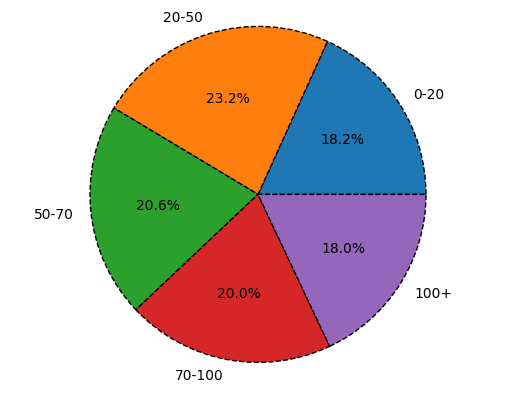

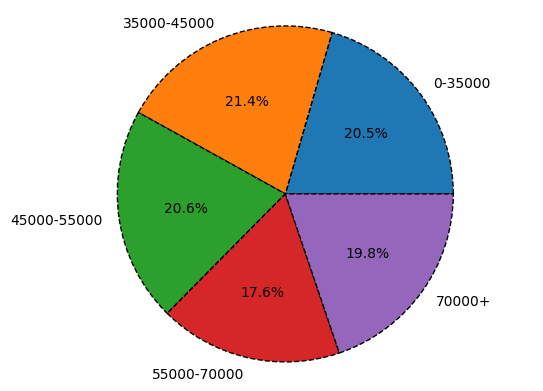

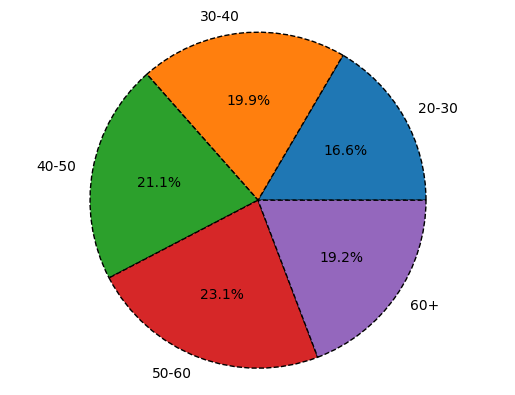

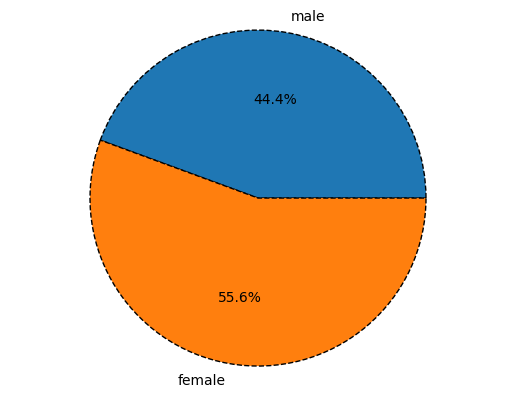

In [1887]:
show_metrics("PDN", ["0-20", "20-50", "50-70", "70-100", "100+"], [20,50,70,100], answers)
show_metrics("INCOME", ["0-35000", "35000-45000", "45000-55000", "55000-70000", "70000+"], [35000,45000,55000,70000], answers)
show_metrics("AGE", ["20-30", "30-40", "40-50", "50-60", "60+"], [30,40,50,60], answers)
list1 = [0,0]
for i in range(len(resultData["GENDER"])):
    if answers[i] == 0:
        continue
    else:
        if resultData["GENDER"][i] == 1:
            list1[0] += 1
        else:
            list1[1] += 1
            
fig, ax = plt.subplots()
ax.pie(np.array(list1), labels = np.array(["male", "female"]),autopct='%1.1f%%', wedgeprops={'lw':1, 'ls':'--','edgecolor':"k"})
ax.axis("equal")